# 웹캠, Colab, OpenPose 연동

웹캠으로 받은 영상을 Colabd과 연동하여 Colab에서 실행되는 OpenPose로 포즈를 추출하고 이를 노트북 화면으로 보여준다.

OpenPose 코드는 https://github.com/dhrim/tf-pose-estimation를 사용하였고

webcam과 Colab 연동은 colab 가이드의 문서 https://colab.research.google.com/drive/1tbAeRge6KKgCYdC6ihDrsl80aRYoVOMa#scrollTo=QBFFBpx0TV5X&forceEdit=true&offline=true&sandboxMode=true를 참조하였다.


# OpenPose 설치

ildoonet님의 tf-pose-estimation을 다운로드 받고, 필요한 라이브러리를 설치한다.

In [ ]:
%cd /content

import os
from os.path import exists, join, basename, splitext

if not exists('tf-pose-estimation'):
  !git clone https://github.com/dhrim/tf-pose-estimation

%cd tf-pose-estimation
#!pip install -r requirements.txt
#!python setup.py install 
!pip install -e .

# 필요 라이브러리 설치

In [2]:
!pip install tf_slim

     |████████████████████████████████| 352 kB 7.1 MB/s 


# OpenPose 패키지 방식의 사용법

아래 방식으로 사용할 수 있는데,
반환된 결과가  COCO 스타일이다.

In [3]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

In [4]:
import sys
sys.path.insert(0, "/content/tf-pose-estimation/tf_pose")
from tf_pose import common


image_path = './images/p1.jpg'
import tf_pose
humans = tf_pose.infer(image_path)
print(humans)


[2022-01-06 05:14:32,973] [TfPoseEstimator] [INFO] loading graph from /content/tf-pose-estimation/models/graph/cmu/graph_opt.pb(default size=432x368)
2022-01-06 05:14:32,973 INFO loading graph from /content/tf-pose-estimation/models/graph/cmu/graph_opt.pb(default size=432x368)


TfPoseEstimator/Openpose/concat_stage7/axis
TfPoseEstimator/Mconv7_stage6_L2/biases
TfPoseEstimator/Mconv7_stage6_L2/weights
TfPoseEstimator/Mconv6_stage6_L2/biases
TfPoseEstimator/Mconv6_stage6_L2/weights
TfPoseEstimator/Mconv5_stage6_L2/biases
TfPoseEstimator/Mconv5_stage6_L2/weights
TfPoseEstimator/Mconv4_stage6_L2/biases
TfPoseEstimator/Mconv4_stage6_L2/weights
TfPoseEstimator/Mconv3_stage6_L2/biases
TfPoseEstimator/Mconv3_stage6_L2/weights
TfPoseEstimator/Mconv2_stage6_L2/biases
TfPoseEstimator/Mconv2_stage6_L2/weights
TfPoseEstimator/Mconv1_stage6_L2/biases
TfPoseEstimator/Mconv1_stage6_L2/weights
TfPoseEstimator/Mconv7_stage6_L1/biases
TfPoseEstimator/Mconv7_stage6_L1/weights
TfPoseEstimator/Mconv6_stage6_L1/biases
TfPoseEstimator/Mconv6_stage6_L1/weights
TfPoseEstimator/Mconv5_stage6_L1/biases
TfPoseEstimator/Mconv5_stage6_L1/weights
TfPoseEstimator/Mconv4_stage6_L1/biases
TfPoseEstimator/Mconv4_stage6_L1/weights
TfPoseEstimator/Mconv3_stage6_L1/biases
TfPoseEstimator/Mconv3_st

# OpenPose 호출 함수 선언

웹캠으로 전달받은 이미지를 OpenPose로 처리하기 위한 함수를 선언한다.

In [5]:
import sys
sys.path.insert(0, "/content/tf-pose-estimation/tf_pose")

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path

w = 400
h = 300

e = TfPoseEstimator(get_graph_path('mobilenet_v2_large'), target_size=(w, h))



def extract_pose(image):
  humans = e.inference(image, resize_to_default=(w>0 and h>0), upsample_size=4.0)
  return humans
  
def get_pose_extracted_image(image):
  humans = extract_pose(image)
  pose_extracted_image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
  %matplotlib inline 
  from matplotlib.pyplot import imshow
  imshow(pose_extracted_image)

  return pose_extracted_image
  

[2022-01-06 05:14:52,830] [TfPoseEstimator] [INFO] loading graph from /content/tf-pose-estimation/models/graph/mobilenet_v2_large/graph_opt.pb(default size=400x300)
2022-01-06 05:14:52,830 INFO loading graph from /content/tf-pose-estimation/models/graph/mobilenet_v2_large/graph_opt.pb(default size=400x300)


TfPoseEstimator/Openpose/concat_stage7/axis
TfPoseEstimator/Mconv7_stage6_L2/biases
TfPoseEstimator/Mconv7_stage6_L2/weights
TfPoseEstimator/Mconv6_stage6_L2/biases
TfPoseEstimator/Mconv6_stage6_L2/weights
TfPoseEstimator/Mconv5_stage6_L2/biases
TfPoseEstimator/Mconv5_stage6_L2/weights
TfPoseEstimator/Mconv4_stage6_L2/biases
TfPoseEstimator/Mconv4_stage6_L2/weights
TfPoseEstimator/Mconv3_stage6_L2/biases
TfPoseEstimator/Mconv3_stage6_L2/weights
TfPoseEstimator/Mconv2_stage6_L2/biases
TfPoseEstimator/Mconv2_stage6_L2/weights
TfPoseEstimator/Mconv1_stage6_L2/biases
TfPoseEstimator/Mconv1_stage6_L2/weights
TfPoseEstimator/Mconv7_stage6_L1/biases
TfPoseEstimator/Mconv7_stage6_L1/weights
TfPoseEstimator/Mconv6_stage6_L1/biases
TfPoseEstimator/Mconv6_stage6_L1/weights
TfPoseEstimator/Mconv5_stage6_L1/biases
TfPoseEstimator/Mconv5_stage6_L1/weights
TfPoseEstimator/Mconv4_stage6_L1/biases
TfPoseEstimator/Mconv4_stage6_L1/weights
TfPoseEstimator/Mconv3_stage6_L1/biases
TfPoseEstimator/Mconv3_st

# 웹화면 구성

2개의 엘리멘트를 생성한다.

웹캠으로 받은 영상을 그대로 보여주는  'video'와 OpenPose로 처리한 것을 보여주는'output'이름의  'img'
  
  

In [6]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

VIDEO_HTML = """
<video autoplay
 width=400 height=300></video>
<br>
<img id="output" src="https://ko.wikipedia.org/static/images/wikimedia-button.png"/>


<script>
var video = document.querySelector('video')
navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)

var canvas = document.createElement('canvas')
var [w,h] = [video.offsetWidth, video.offsetHeight]
canvas.width = w
canvas.height = h


</script>
"""

DATA_HTML = """
<script>
canvas.getContext('2d').drawImage(video, 0, 0, w, h)
var data = canvas.toDataURL('image/jpeg', %f)
</script>
"""

# 웹캠 포즈 추츨 실행

위에서 설정한 video에서 데이터를 읽고, OpenPose를 호출하여 처리한 이미지를 표시한다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


KeyboardInterrupt: ignored

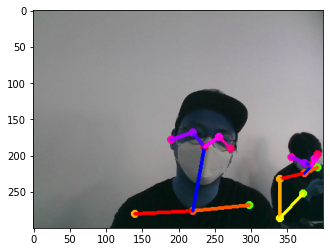

In [8]:
from IPython.display import Image, display
from matplotlib import pyplot as plt
import cv2
import numpy as np
import base64

%matplotlib inline

def convert_jpeg_binary_to_cv2_image(binary_image):
  return cv2.imdecode(np.fromstring(binary_image, dtype=np.uint8), -1)


def show_pose_extracted(quality=1.0):
  display(HTML(VIDEO_HTML))
  while True:
    display(HTML(DATA_HTML % quality))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])
    cv2_image = convert_jpeg_binary_to_cv2_image(binary)
    
    extracted = get_pose_extracted_image(cv2_image)
    
    binanry_img = cv2.imencode('.jpg', extracted)[1]
    
    b64 = base64.b64encode(binanry_img).decode('ascii')
    display(HTML('''<script>document.getElementById("output").src="data:image/jpg;base64, {}"</script>'''.format(b64)))
    if data is None: break

  
show_pose_extracted()